In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils

In [14]:

file_line = "h3_metrics_h1_DT_05_29_2020.csv"
# file_line = "h3_model_performance_05_27_2020.csv"

df = pd.read_csv(file_line)

print(len(df))
# df.dropna(subset=[c.PRED_25], inplace=True)
# df.dropna(subset=[c.PRED_50], inplace=True)

# df.where(df[c.T_RECORDS] > 2, inplace = True)
# df.where(df[c.P_NA] <= .75, inplace = True)
# df.dropna()

print(len(df))

3456
3456


In [15]:
def print_is_gaussian(sample, pred, task_type, alpha):
    print("\nGaussian test for {0}:\n".format(task_type))
    utils.gaussian_test(sample[pred], alpha)

In [16]:
def print_std(sample, pred, task_type):
    print("{0} sample std: {1}".format(task_type, round(sample[pred].std(), 2)))

In [17]:
def print_median(sample, pred, task_type):
    print("{0} sample median: {1}".format(task_type, round(sample[pred].median(), 2)))

In [18]:
def get_task_sample(df, task_type, sample_size):
    sample = df[df[c.TASK] == task_type].sample(n=sample_size, random_state=0)
    return sample

In [19]:
def hypothesisTest_Effort(model_records, model, pred, sample_size):
    print("H3 test for {0}:".format(model))
    
    s1_filter = (model_records[c.MODEL] == model)
    model_records = model_records[s1_filter]

    s1 = get_task_sample(model_records, "BUG", sample_size)
    s2 = get_task_sample(model_records, "DOCS", sample_size)
    s3 = get_task_sample(model_records, "REFACTOR", sample_size)
    s4 = get_task_sample(model_records, "TESTING", sample_size)
    s5 = get_task_sample(model_records, "FEATURE", sample_size)
    s6 = get_task_sample(model_records, "UPGRADE", sample_size)
    s7 = get_task_sample(model_records, "RELEASE", sample_size)
    s8 = get_task_sample(model_records, "SUPPORT", sample_size)
    s9 = get_task_sample(model_records, "OTHER", sample_size)

    num_records = len(s1)

    print("Number of records: {:.2f}".format(num_records))

    alpha = 0.05

    samples = [s1, s2, s3, s4, s5, s6, s7, s8, s9]

    for s in samples:
        print_median(s, pred, s.Task.values[0])

    for s in samples:
        print_std(s, pred, s.Task.values[0])
    
    for s in samples:
        print_is_gaussian(s, pred, s.Task.values[0], alpha)


    utils.multi_sample_rank_test(s1[pred], s2[pred], s3[pred], s4[pred], s5[pred], s6[pred], s7[pred], s8[pred], s9[pred], alpha)

    fig = plt.figure(figsize=(10,5))
    plt.tight_layout()
    sb.set(style="dark", palette="pastel")
    ax = sb.boxplot(x=c.TASK, y=c.PRED_25, data=model_records)
    ax.set_title('PRED25 Distributions for {0}'.format(model))
    sb.despine(offset=10, trim=True)
    plt.show()

In [20]:
task = "BUG"
sample_size = 40

H3 test for Module_CC:
Number of records: 40.00
BUG sample median: 0.72
DOCS sample median: 0.9
REFACTOR sample median: 0.95
TESTING sample median: 0.86
FEATURE sample median: 0.96
UPGRADE sample median: 0.94
RELEASE sample median: 0.93
SUPPORT sample median: 0.9
OTHER sample median: 0.61
BUG sample std: 0.14
DOCS sample std: 0.09
REFACTOR sample std: 0.1
TESTING sample std: 0.12
FEATURE sample std: 0.08
UPGRADE sample std: 0.08
RELEASE sample std: 0.14
SUPPORT sample std: 0.1
OTHER sample std: 0.18

Gaussian test for BUG:

Shapiro p-value:  0.4917598366737366
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussian test for DOCS:

Shapiro p-value:  0.004084885586053133
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  2.838553427864099e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  0.07299567759037018
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussi

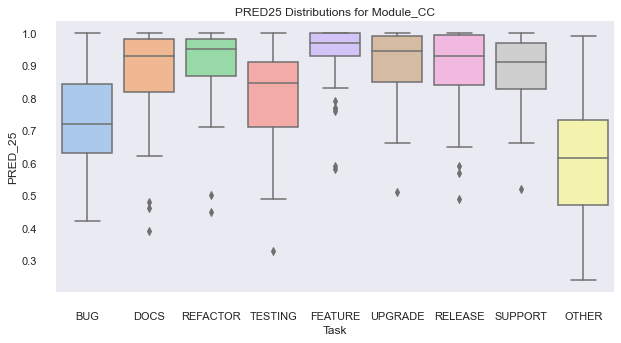

In [21]:
hypothesisTest_Effort(df.copy(), c.MODULE_CC, c.PRED_25, sample_size)

H3 test for Module_EC:
Number of records: 40.00
BUG sample median: 0.88
DOCS sample median: 0.97
REFACTOR sample median: 0.99
TESTING sample median: 0.92
FEATURE sample median: 0.99
UPGRADE sample median: 0.99
RELEASE sample median: 0.99
SUPPORT sample median: 0.97
OTHER sample median: 0.78
BUG sample std: 0.14
DOCS sample std: 0.08
REFACTOR sample std: 0.08
TESTING sample std: 0.12
FEATURE sample std: 0.07
UPGRADE sample std: 0.09
RELEASE sample std: 0.11
SUPPORT sample std: 0.12
OTHER sample std: 0.17

Gaussian test for BUG:

Shapiro p-value:  0.0001813289854908362
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for DOCS:

Shapiro p-value:  9.487821444054134e-06
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  1.8509416577217053e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  9.667445556260645e-05
Shapiro Test: Sample does not look Gaussian (reject 

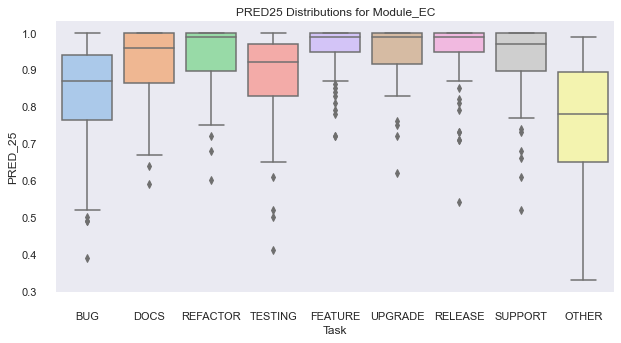

In [22]:
hypothesisTest_Effort(df.copy(), c.MODULE_EC, c.PRED_25, sample_size)

H3 test for Line_CC:
Number of records: 40.00
BUG sample median: 0.68
DOCS sample median: 0.9
REFACTOR sample median: 0.95
TESTING sample median: 0.81
FEATURE sample median: 0.96
UPGRADE sample median: 0.94
RELEASE sample median: 0.91
SUPPORT sample median: 0.88
OTHER sample median: 0.55
BUG sample std: 0.17
DOCS sample std: 0.12
REFACTOR sample std: 0.1
TESTING sample std: 0.13
FEATURE sample std: 0.1
UPGRADE sample std: 0.1
RELEASE sample std: 0.17
SUPPORT sample std: 0.11
OTHER sample std: 0.19

Gaussian test for BUG:

Shapiro p-value:  0.7464080452919006
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussian test for DOCS:

Shapiro p-value:  0.003010641084983945
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  8.334411631949479e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  0.15017838776111603
Shapiro Test: Sample looks Gaussian (fail to reject H0)

Gaussian

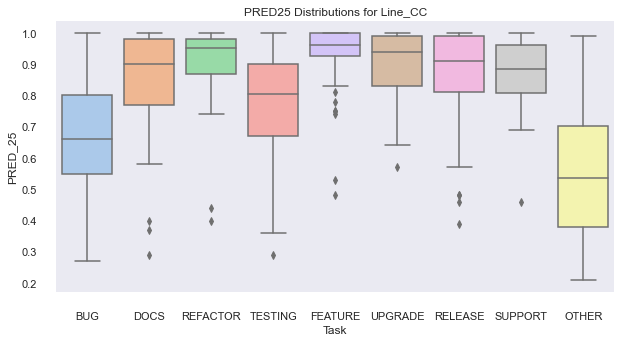

In [23]:
hypothesisTest_Effort(df.copy(), c.LINE_CC, c.PRED_25, sample_size)

H3 test for Line_EC:
Number of records: 40.00
BUG sample median: 0.86
DOCS sample median: 0.96
REFACTOR sample median: 0.99
TESTING sample median: 0.91
FEATURE sample median: 0.99
UPGRADE sample median: 0.98
RELEASE sample median: 0.99
SUPPORT sample median: 0.96
OTHER sample median: 0.76
BUG sample std: 0.16
DOCS sample std: 0.12
REFACTOR sample std: 0.07
TESTING sample std: 0.14
FEATURE sample std: 0.08
UPGRADE sample std: 0.1
RELEASE sample std: 0.14
SUPPORT sample std: 0.14
OTHER sample std: 0.21

Gaussian test for BUG:

Shapiro p-value:  0.0003018398710992187
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for DOCS:

Shapiro p-value:  1.519764850854699e-06
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  4.3197618992962816e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  4.849043398280628e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

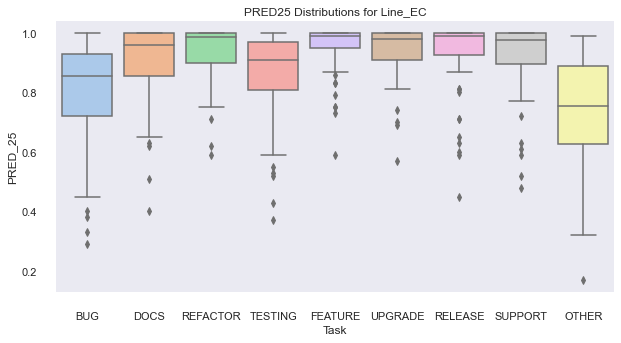

In [24]:
hypothesisTest_Effort(df.copy(), c.LINE_EC, c.PRED_25, sample_size)